<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-the-genetic-basis-of-metabolite-accumulation-and-depletion" data-toc-modified-id="Predicting-the-genetic-basis-of-metabolite-accumulation-and-depletion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting the genetic basis of metabolite accumulation and depletion</a></span></li><li><span><a href="#Producibility-analysis" data-toc-modified-id="Producibility-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Producibility analysis</a></span><ul class="toc-item"><li><span><a href="#Function-definitions" data-toc-modified-id="Function-definitions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function definitions</a></span><ul class="toc-item"><li><span><a href="#FBA-of-Recon3D-from-cobra" data-toc-modified-id="FBA-of-Recon3D-from-cobra-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>FBA of Recon3D from cobra</a></span></li></ul></li><li><span><a href="#UDN-metabolites-of-Recon3D" data-toc-modified-id="UDN-metabolites-of-Recon3D-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>UDN metabolites of Recon3D</a></span><ul class="toc-item"><li><span><a href="#FBA-of-R-from-cvx" data-toc-modified-id="FBA-of-R-from-cvx-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>FBA of R from cvx</a></span></li></ul></li></ul></li><li><span><a href="#Metabolite-producibility-applied-to-UDN-metabolites" data-toc-modified-id="Metabolite-producibility-applied-to-UDN-metabolites-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metabolite producibility applied to UDN metabolites</a></span><ul class="toc-item"><li><span><a href="#Naive-implementation-of-Metabolite-producibility-applied-to-biomass-components" data-toc-modified-id="Naive-implementation-of-Metabolite-producibility-applied-to-biomass-components-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Naive implementation of Metabolite producibility applied to biomass components</a></span><ul class="toc-item"><li><span><a href="#Cobrapy-implementation" data-toc-modified-id="Cobrapy-implementation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Cobrapy implementation</a></span></li><li><span><a href="#Comparison-of-Cobrapy-implementation-with-Figure-1" data-toc-modified-id="Comparison-of-Cobrapy-implementation-with-Figure-1-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Comparison of Cobrapy implementation with Figure 1</a></span></li><li><span><a href="#Comparison-of-Cobrapy-implementation-with-Figure-2" data-toc-modified-id="Comparison-of-Cobrapy-implementation-with-Figure-2-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Comparison of Cobrapy implementation with Figure 2</a></span></li></ul></li></ul></li><li><span><a href="#Omi" data-toc-modified-id="Omi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Omi</a></span></li></ul></div>

# Predicting the genetic basis of metabolite accumulation and depletion#

From

* Imielinski, M., Belta, C., Halasz, A., & Rubin, H. (2005). [Investigating metabolite essentiality through genome-scale analysis of Escherichia coli production capabilities](http://doi.org/10.1093/bioinformatics/bti245). Bioinformatics, 21(9), 2008–2016. 
* Imielinski, M., Klitgord, N., Belta, C., Klitgord, N., & Belta, C. (2008). [Investigating the genomic basis of metabolic robustness through in silico flux analysis](http://doi.org/10.1109/CDC.2008.4739459). In 2008 47th IEEE Conference on Decision and Control (pp. 793–798). IEEE. 

Notation: for $n,i\in{\mathbb N}$,we use $I_n$ to denote the $n\times n$ identity matrix, and $e^{n,i}\in{\mathbb R}^n$ to denote the $i$-th element of the Euclidean basis in $\mathbb R^n$. Given $m,n\in\mathbb N$, we use the notation $M=\{1,\ldots,m\}$ and $N=\{1,\ldots,n\}$.  For a set $C$, we use $|C$ to denote its cardinality. If $A\in\mathbb R^{m\times n}$ and $U\subset M$, then $A_U$ denotes the submatrix of $A$ containing the rows with indices in the set $U$. Therefore, if $x\in \mathbb R^n$, $i\in N$, and $U\subset N$, then $x_i$ and $x_U\in\mathbb R^{|U|}$ denote its $i$th component and the vector formed by taking components in set $U$, respectively.  Let $S\in\mathbb R^{m\times n}$ be the stoichiometric matrix, $x$ the set of $m$ metabolite concentrations, and $v$ the set of reaction fluxes. Then 

$$\begin{equation}
\dot{x} = Sv, v\geq 0
\end{equation}$$

$$\begin{equation}
Sv = 0, v\geq 0
\end{equation}$$

# Producibility analysis 

A metabolite $j\in M$ is called *producible* by the metabolic network (1) if the network can sustain its synthesis under the steady state and thermodynamic constraints in equation $(2)$.
To test producibility of metabolite $j$, we add a "fictitious" chemical reaction that uses metabolite $j$, and then test whether the network can produce strictly positive flux through this chemical reaction, while observing the steady state and thermodynamic constraints. Formally, this corresponds to an augmentation of the stoichiometry matrix $S$ with $e^{m,j}$ on the right, and the flux vector $v$ with $w\in\mathbb R$, $w \geq 0$ at the bottom. In other words, $w$ corresponds to the flux through the additional chemical reaction. To characterize the production capabilities of a metabolic network globally, we can add one test chemical reaction for each metabolite, and correspondingly augment the stoichiometry matrix $S$ with $I_m$ on the right and $v$ with a $w \in \mathbb R^n$, $w \geq 0$
at the bottom. We will denote the augmented matrix by
$\bar{S} \in\mathbb R^{m\times(n+m)}$ and the augmented vector by $\bar{v}\in\mathbb R^{n+m}$.
In this framework, producibility of metabolite $j\in M$ can be decided by solving the following LP:

$$\begin{equation}
\begin{array}{ll}
\underset{\bar{v}\in\mathbb R^{n+m}}{\max} & \bar{v}_{j+n}  \\
& \bar{S}\bar{v} = 0 \\
& \bar{v} \geq 0 \\
& \bar{v}_{j+n}\leq\alpha \\
\end{array}\end{equation}$$

where $\alpha$ is an arbitrary constant that keeps the problem bounded. If the optimal value of $(3)$ is zero, then metabolite $j$ is not producible.  Othewise metabolite $j$ is (potentially) producible.  To test the producibility of a metabolite under metabolic gene knockouts, one can simply add the equality constraints $\bar{v}_J = 0$ to (3) where $J$ is the set of reactions knocked out by the gene knockouts.

In order to asses the robustness of metabolism, we are interested in studying the producibility of each metabolite in a metabolic network under various metabolic gene knock- outs. With the framework we presented so far, this would imply solving a number of LP equal to the number of gene perturbations multiplied the number of metabolites. Since the size of each LP is in the order of thousands, and the number of gene perturbations is in the order of millions, such an approach would be infeasible computationally. In this paper, we propose the reduce the amount of computation by using both problem (3) and its dual, whose solutions are available simultaneously if an interior-point-type optimization method (such as the one implemented in SeDuMi [1]) is used. In the following we show that, in most of the cases, it is enough to solve one LP to decide the producibility of all metabolites. 

First, whenever we find a solution $\bar{v}$ of (3), we search it for all components for which $\bar{v}_{n+i}> 0$. If such a component is found, then we label metabolite $i$ as producible. Second, the dual of (3) is given by 

$$\begin{equation}
\begin{array}{ll}
\underset{g\in\mathbb R^m,s\in\mathbb R}{\min} & \alpha s\\
\text{subject to} & \bar{S}^Tg + se^{n+m,j+n}\leq e^{n+m,j+n} \\
& s\geq 0 \\
\end{array}
\end{equation}$$

where $s$ is a "slack" variable.  It is easy to see that the primal problem $(3)$ can only produce two optimal values of its objective: $0$ and $\alpha$.   Therefore the optimal value of the dual problem $(4)$ can only be $0$ or $\alpha$, which implies that every dual solution $g\in\mathbb R^m$ satisfies $\bar{S}^Tg\geq 0$. In our previous work, by employing a simple variation of Farkas' Lemma, we showed that $g$ satisfying 

$$\left\{\begin{array}{c}
\left(\bar{S}^Tg\right)_{n+i} >0 \\
\bar{S}^Tg \geq  0 \\
\end{array}\right\}$$

certifies the infeasibility of the set 

$$\left\{
\begin{array}{cc}
\bar{S}\bar{v} = 0, \\
\bar{v} = 0,  \\
\bar{v}_{n+i} > 0 \\
\end{array}
\right\}$$

Therefore, by a simple inspection fo the solution $g$ of the dual problem $(4)$, we can classify all metabolites $i$ for which $\left(\bar{S}^Tg\right)_{n+i} > 0$ as "non-producible".

## Function definitions

In [2]:
import cobra, libsbml, escher,numpy as np, pandas as pd
import scipy.sparse
import cvxpy as cvx
import pandas as pd
from cobra.flux_analysis import single_gene_deletion

def makeS_and_rxn_bounds( model ):
    rxns = [rxn.id for rxn in model.reactions]
    mets = [met.name for met in model.metabolites] 
    S = cobra.util.create_stoichiometric_matrix(model, 
                                                array_type='DataFrame') 
                
    S.columns.name = 'reactions'
    S.index.name = 'metabolites'
    lower_bounds = pd.Series([rxn.lower_bound for rxn in model.reactions] , index=rxns)
    upper_bounds = pd.Series([rxn.upper_bound for rxn in model.reactions] , index= rxns)
    
    return S, lower_bounds, upper_bounds
def makeSbar( S ):
    m,n = S.shape
    I = np.eye(m)
    return scipy.sparse.lil_matrix(np.c_[S.value.toarray(), I])

def makeSbarAndE( S ):
    m,n = S.shape
    I = np.eye(m)
    Sbar = np.c_[S.value.toarray(), I]
    E = [np.squeeze(Sbar[j,:].T) for j in range(m)]
    return scipy.sparse.lil_matrix(Sbar), E

def makeBarBounds( m,lower_bounds, upper_bounds, alpha ):
    lower_bound_bar = np.r_[lower_bounds, np.zeros(m)]
    upper_bound_bar = np.r_[upper_bounds, np.ones(m)*alpha]
    return lower_bound_bar, upper_bound_bar
                                          
def augment_model_with_sink_rxns( model, metabolites ):
    new_model = model.copy()
    sink_rxns = dict([(metabolite.id, 
                       cobra.Reaction('Sink_{}'.format(metabolite.id)))
                             for metabolite in metabolites])
    new_model.add_reactions( sink_rxns.values() )
    for metabolite in metabolites:
        sink_rxns[metabolite.id].reaction = '{} -->'.format(metabolite.id)
    return new_model
def apply_rich_media( model ):
    for exchange in cobra.medium.boundary_types.find_boundary_types(model,'exchange'):
            exchange.lower_bound= -10
    return model

/Users/zuck016/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/zuck016/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### FBA of Recon3D from cobra ###

In [3]:
import os

recon3d = cobra.io.load_json_model(os.path.join('Recon3D_301','Recon3DModel_301.json'))
solution = cobra.flux_analysis.pfba(recon3d)
solution

,fluxes,reduced_costs
10FTHF5GLUtl,0.000000,-2.000000
10FTHF5GLUtm,0.000000,-2.000000
10FTHF6GLUtl,0.000000,-2.000000
10FTHF6GLUtm,0.000000,-2.000000
10FTHF7GLUtl,0.000000,-2.000000
...,...,...
CYOR_u10mi,666.666667,-2.000000
Htmi,0.000000,0.109053
NADH2_u10mi,0.000000,5.106996
CYOOm3i,0.000000,-1.859259


In [19]:
recon3d_bigg = cobra.io.read_sbml_model(os.path.join('Recon3D_301','Recon3D_bigg.xml'))
recon3d_bigg

Name,Recon3D
Memory address,0x012947ca90
Number of metabolites,5835
Number of reactions,10600
Objective expression,-1.0*BIOMASS_maintenance_reverse_5b3f9 + 1.0*BIOMASS_maintenance
Compartments,"cytosol, lysosome, mitochondria, endoplasmic reticulum, extracellular space, peroxisome/glyoxysome, nucleus, golgi apparatus, default"


In [39]:
len(recon3d.genes)

2248

## UDN metabolites of Recon3D

In [25]:
udn_bigg_cpds = pd.read_table('UDN_cpds_bigg.tab', index_col='bigg')
#udn_bigg_cpds.index = [cpd.replace('__','_') for cpd in udn_bigg_cpds.index]
udn_bigg_cpds

,Compound,Metacyc Object ID,Map to Homo sapiens,PubChem,CAS,ChEBI,DrugBank,HMDB,LIPID MAPS,Synonyms,XREF:metacyc,MNX_ID,Evidence:metacyc,Description:metacyc,XREF:bigg,Evidence:bigg,Description:bigg
bigg,,,,,,,,,,,,,,,,,
akg,2-KETOGLUTARATE,2-KETOGLUTARATE,2-KETOGLUTARATE,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,NaN,<a href='http://www.hmdb.ca/metabolites/HMDB00...,NaN,2-oxoglutarate // ketoglutarate // &alpha;-ket...,metacyc:2-KETOGLUTARATE,MNXM20,identity,2-KETOGLUTARATE|2-ketoglutarate|2-ketoglutaric...,bigg:akg,identity,2-Oxoglutarate
h2co3,CO3,CO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metacyc:CO3,MNXM96530,identity,CO3|carbonate,bigg:h2co3,reference,Carbonic acid
chsterol,CHOLESTEROL,CHOLESTEROL,CHOLESTEROL,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,<a href='http://www.drugbank.ca/drugs/DB04540'...,<a href='http://www.hmdb.ca/metabolites/HMDB00...,NaN,5-cholestene-3&beta;-ol,metacyc:CHOLESTEROL,MNXM103,identity,5-cholestene-3beta-ol|CHOLESTEROL|cholesterol,bigg:chsterol,identity,Chsterol
creat,CREATININE,CREATININE,CREATININE,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,NaN,<a href='http://www.hmdb.ca/metabolites/HMDB00...,NaN,krebiozen // 2-imino-1-methyl-4-imidazolidinon...,metacyc:CREATININE,MNXM1470,identity,1-methyl-2-amino-imidazol-4-one|2-imino-1-meth...,bigg:creat,identity,Creat
4crsol,CPD-108,CPD-108,CPD-108,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,<a href='http://www.drugbank.ca/drugs/DB01688'...,<a href='http://www.hmdb.ca/metabolites/HMDB01...,NaN,4-hydroxytoluene // p-hydroxytoluene // 4-cres...,metacyc:CPD-108,MNXM828,identity,4-cresol|4-hydroxytoluene|4-methylphenol|CPD-1...,bigg:4crsol,identity,P-Cresol
2amac,2-AMINOACRYLATE,2-AMINOACRYLATE,2-AMINOACRYLATE,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,NaN,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,NaN,<a href='http://www.hmdb.ca/metabolites/HMDB03...,NaN,2-aminoacrylate // &alpha;-aminoacrylate // 2-...,metacyc:2-AMINOACRYLATE,MNXM3414,identity,"2,3-didehydroalanine|2-AMINOACRYLATE|2-aminoac...",bigg:2amac,identity,2amac
glc__D,D-Glucose,D-Glucose,D-Glucose,NaN,NaN,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,NaN,NaN,NaN,D-gluco-hexose,metacyc:D-Glucose,MNXM41,identity,D-Glucose|D-gluco-hexose|D-glucose,bigg:glc__D,identity,D-Glucose
mal__D,CPD-660,CPD-660,CPD-660,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,NaN,<a href='http://www.hmdb.ca/metabolites/HMDB31...,NaN,D-malate // D-malic acid // D-(+)-malic acid,metacyc:CPD-660,MNXM1608,identity,(R)-malate|CPD-660|D-(+)-malic acid|D-malate|D...,bigg:mal__D,identity,D-Malate
mnl,MANNITOL,MANNITOL,NaN,<a href='http://pubchem.ncbi.nlm.nih.gov/summa...,<a href='http://www.commonchemistry.org/Chemic...,<a href='http://www.ebi.ac.uk/chebi/searchId.d...,<a href='http://www.drugbank.ca/drugs/DB00742'...,<a href='http://www.hmdb.ca/metabolites/HMDB00...,NaN,D-mitobronitol,metacyc:MANNITOL,MNXM615,identity,D-mannitol|D-mitobronitol|MANNITOL,bigg:mnl,identity,D-Mannitol


In [24]:
recon3d_mets = dict([cpd.annotation['bigg.metabolite'], cpd] for cpd in recon3d_bigg.metabolites)

In [26]:
udn_recon = []
for met in udn_bigg_cpds.index:
    try:
        udn_recon.append(recon3d_mets[met])
    except KeyError:
        print('{} not in recon3d'.format(met))

4crsol not in recon3d
mal__D not in recon3d
mnl not in recon3d
CE1787 not in recon3d
orn__L not in recon3d
malon not in recon3d
salc not in recon3d


In [40]:
udn_recon

[<Metabolite akg_x at 0x128fb9780>,
 <Metabolite h2co3_e at 0x127acf320>,
 <Metabolite chsterol_e at 0x128a68320>,
 <Metabolite creat_e at 0x128c8e400>,
 <Metabolite 2amac_c at 0x129206c50>,
 <Metabolite glc__D_g at 0x128838ac8>,
 <Metabolite man_e at 0x1286fdc88>,
 <Metabolite fum_e at 0x128025668>,
 <Metabolite glyc_e at 0x12871f6d8>,
 <Metabolite glyclt_e at 0x127f08a20>,
 <Metabolite hxan_e at 0x127d8cc18>,
 <Metabolite ala__L_c at 0x128fb1160>,
 <Metabolite asn__L_m at 0x128e4b198>,
 <Metabolite CE5868_e at 0x12825f748>,
 <Metabolite asp__L_e at 0x128e2ab38>,
 <Metabolite cys__L_m at 0x128c3a4e0>,
 <Metabolite cysi__L_e at 0x128c2bfd0>,
 <Metabolite glu__L_r at 0x1288626a0>,
 <Metabolite gln__L_m at 0x128826b70>,
 <Metabolite ile__L_m at 0x1287832b0>,
 <Metabolite leu__L_m at 0x12873eba8>,
 <Metabolite lys__L_x at 0x12870f4e0>,
 <Metabolite met__L_m at 0x1283b5eb8>,
 <Metabolite orn_e at 0x12865d3c8>,
 <Metabolite phe__L_m at 0x128602e48>,
 <Metabolite pro__L_e at 0x1285d3940>,
 <

In [37]:
genes_of_udn_mets = {}
rxns_of_udn_mets = {}
for met in udn_recon:
    rxns_of_udn_mets[met.id] = [rxn.id for rxn in met.reactions]
    for rxn in met.reactions:
        if met.id in genes_of_udn_mets:
            genes_of_udn_mets[met.id] |= set([gene.id for gene in rxn.genes])
        else:
            genes_of_udn_mets[met.id] = set([gene.id for gene in rxn.genes])
            
genes_of_udn_mets['2amac_c']

{'10993_AT1',
 '6818_AT1',
 '7173_AT1',
 '7173_AT2',
 '7173_AT3',
 '7173_AT4',
 '7173_AT5'}

In [39]:
with open('bigg_rxns_of_udn_mets.tab','w') as out:
    out.write('Metabolite\tReactions\n')
    for met in sorted(rxns_of_udn_mets):
        out.write('{}\t{}\n'.format(met, ','.join(rxns_of_udn_mets[met])))

In [37]:
with recon3d:
    for exc in recon3d.exchanges:
        if exc.lower_bound < 0:
            exc.lower_bound = -100
    solution = cobra.flux_analysis.pfba(recon3d)
    display(solution.fluxes.sort_values(ascending=False))

3MOBt2im                  1000.0
ATPtm                     1000.0
RNDR4                     1000.0
EX_imp[e]                 1000.0
r0391                     1000.0
AKGDm                     1000.0
TALA                      1000.0
EX_glcn[e]                1000.0
sink_xol7ah3[c]           1000.0
O2tm                      1000.0
3MOPt2im                  1000.0
EX_nh4[e]                 1000.0
EX_nac[e]                 1000.0
EX_co2[e]                 1000.0
ENO                       1000.0
EX_succ[e]                1000.0
MI1PS                     1000.0
GLUt2m                    1000.0
r0570                     1000.0
RE2112C                   1000.0
EX_h[e]                   1000.0
DRPA                      1000.0
PYK                       1000.0
ATPS4mi                   1000.0
PEPCKm                    1000.0
HMR_4343                  1000.0
EX_pi[e]                  1000.0
r1423                     1000.0
GAPD                      1000.0
r0527                     1000.0
          

In [29]:
medium['EX_glcn[e]']

100

### FBA of R from cvx

In [23]:
biomass_rxn = 'BIOMASS_maintenance'

Sdf, lower_series, upper_series = makeS_and_rxn_bounds( recon3d )
rxns = [rxn for rxn in Sdf.columns]
mets = [met for met in Sdf.index]
m,n = Sdf.shape
biomass = Sdf.columns.get_loc(biomass_rxn)
S = cvx.Constant(cobra.util.create_stoichiometric_matrix(recon3d, array_type='lil'))
v = cvx.Variable(n)

objective = cvx.Maximize(v[biomass] )
lower_bounds, upper_bounds = lower_series.values, upper_series.values

constraints = [S*v == 0,
               lower_bounds <= v,
               v <= upper_bounds]

problem = cvx.Problem(objective, constraints)
problem.solve(verbose=True)
cvx_fluxes = pd.DataFrame({'Flux':np.squeeze(np.asarray(v.value))}, index=rxns)
cvx_fluxes

KeyError: 'BIOMASS_maintenance'

# Metabolite producibility applied to UDN metabolites

In [41]:
recon3d_augmented = augment_model_with_sink_rxns(recon3d_bigg, udn_recon )
recon3d_augmented = apply_rich_media(recon3d_augmented)
metabolite_production = {}
kos = pd.DataFrame()
for reactant in udn_recon:
    with recon3d_augmented:
        recon3d_augmented.objective = 'Sink_{}'.format(reactant.id)
        metabolite_production[('wild-type', reactant.id)] = recon3d_augmented.optimize().objective_value
        ko = single_gene_deletion(recon3d_augmented)
        kos[reactant.id] = ko['growth']

kos.to_csv('recon3d_udn_mets_rich_media.tab',sep='\t')
kos

unknown metabolite 'akg_x' created
unknown metabolite 'h2co3_e' created
unknown metabolite 'chsterol_e' created
unknown metabolite 'creat_e' created
unknown metabolite '2amac_c' created
unknown metabolite 'glc__D_g' created
unknown metabolite 'man_e' created
unknown metabolite 'fum_e' created
unknown metabolite 'glyc_e' created
unknown metabolite 'glyclt_e' created
unknown metabolite 'hxan_e' created
unknown metabolite 'ala__L_c' created
unknown metabolite 'asn__L_m' created
unknown metabolite 'CE5868_e' created
unknown metabolite 'asp__L_e' created
unknown metabolite 'cys__L_m' created
unknown metabolite 'cysi__L_e' created
unknown metabolite 'glu__L_r' created
unknown metabolite 'gln__L_m' created
unknown metabolite 'ile__L_m' created
unknown metabolite 'leu__L_m' created
unknown metabolite 'lys__L_x' created
unknown metabolite 'met__L_m' created
unknown metabolite 'orn_e' created
unknown metabolite 'phe__L_m' created
unknown metabolite 'pro__L_e' created
unknown metabolite 'ser__L_x

IndexError: tuple index out of range

## Naive implementation of Metabolite producibility applied to biomass components




### Cobrapy implementation

In [22]:
recon3d_augmented = augment_model_with_sink_rxns(recon3d, recon3d.reactions.BIOMASS_reaction.reactants  )
recon3d_augmented = apply_rich_media(recon3d_augmented)
metabolite_production = {}
kos = pd.DataFrame()
for reactant in recon3d_augmented.reactions.BIOMASS_reaction.reactants:
    with recon3d_augmented:
        recon3d_augmented.objective = 'Sink_{}'.format(reactant.id)
        metabolite_production[('wild-type', reactant.id)] = recon3d_augmented.optimize().objective_value
        ko = single_gene_deletion(recon3d_augmented )
        kos[reactant.id] = ko['growth']

kos.to_csv('recon3d_naive_growth_rich_media.tab',sep='\t')
kos

AttributeError: DictList has no attribute or entry BIOMASS_reaction

In [15]:
oks = kos[kos<1e-3].fillna(1).iloc[:38]
oks.shape

(38, 38)

### Comparison of Cobrapy implementation with Figure 1

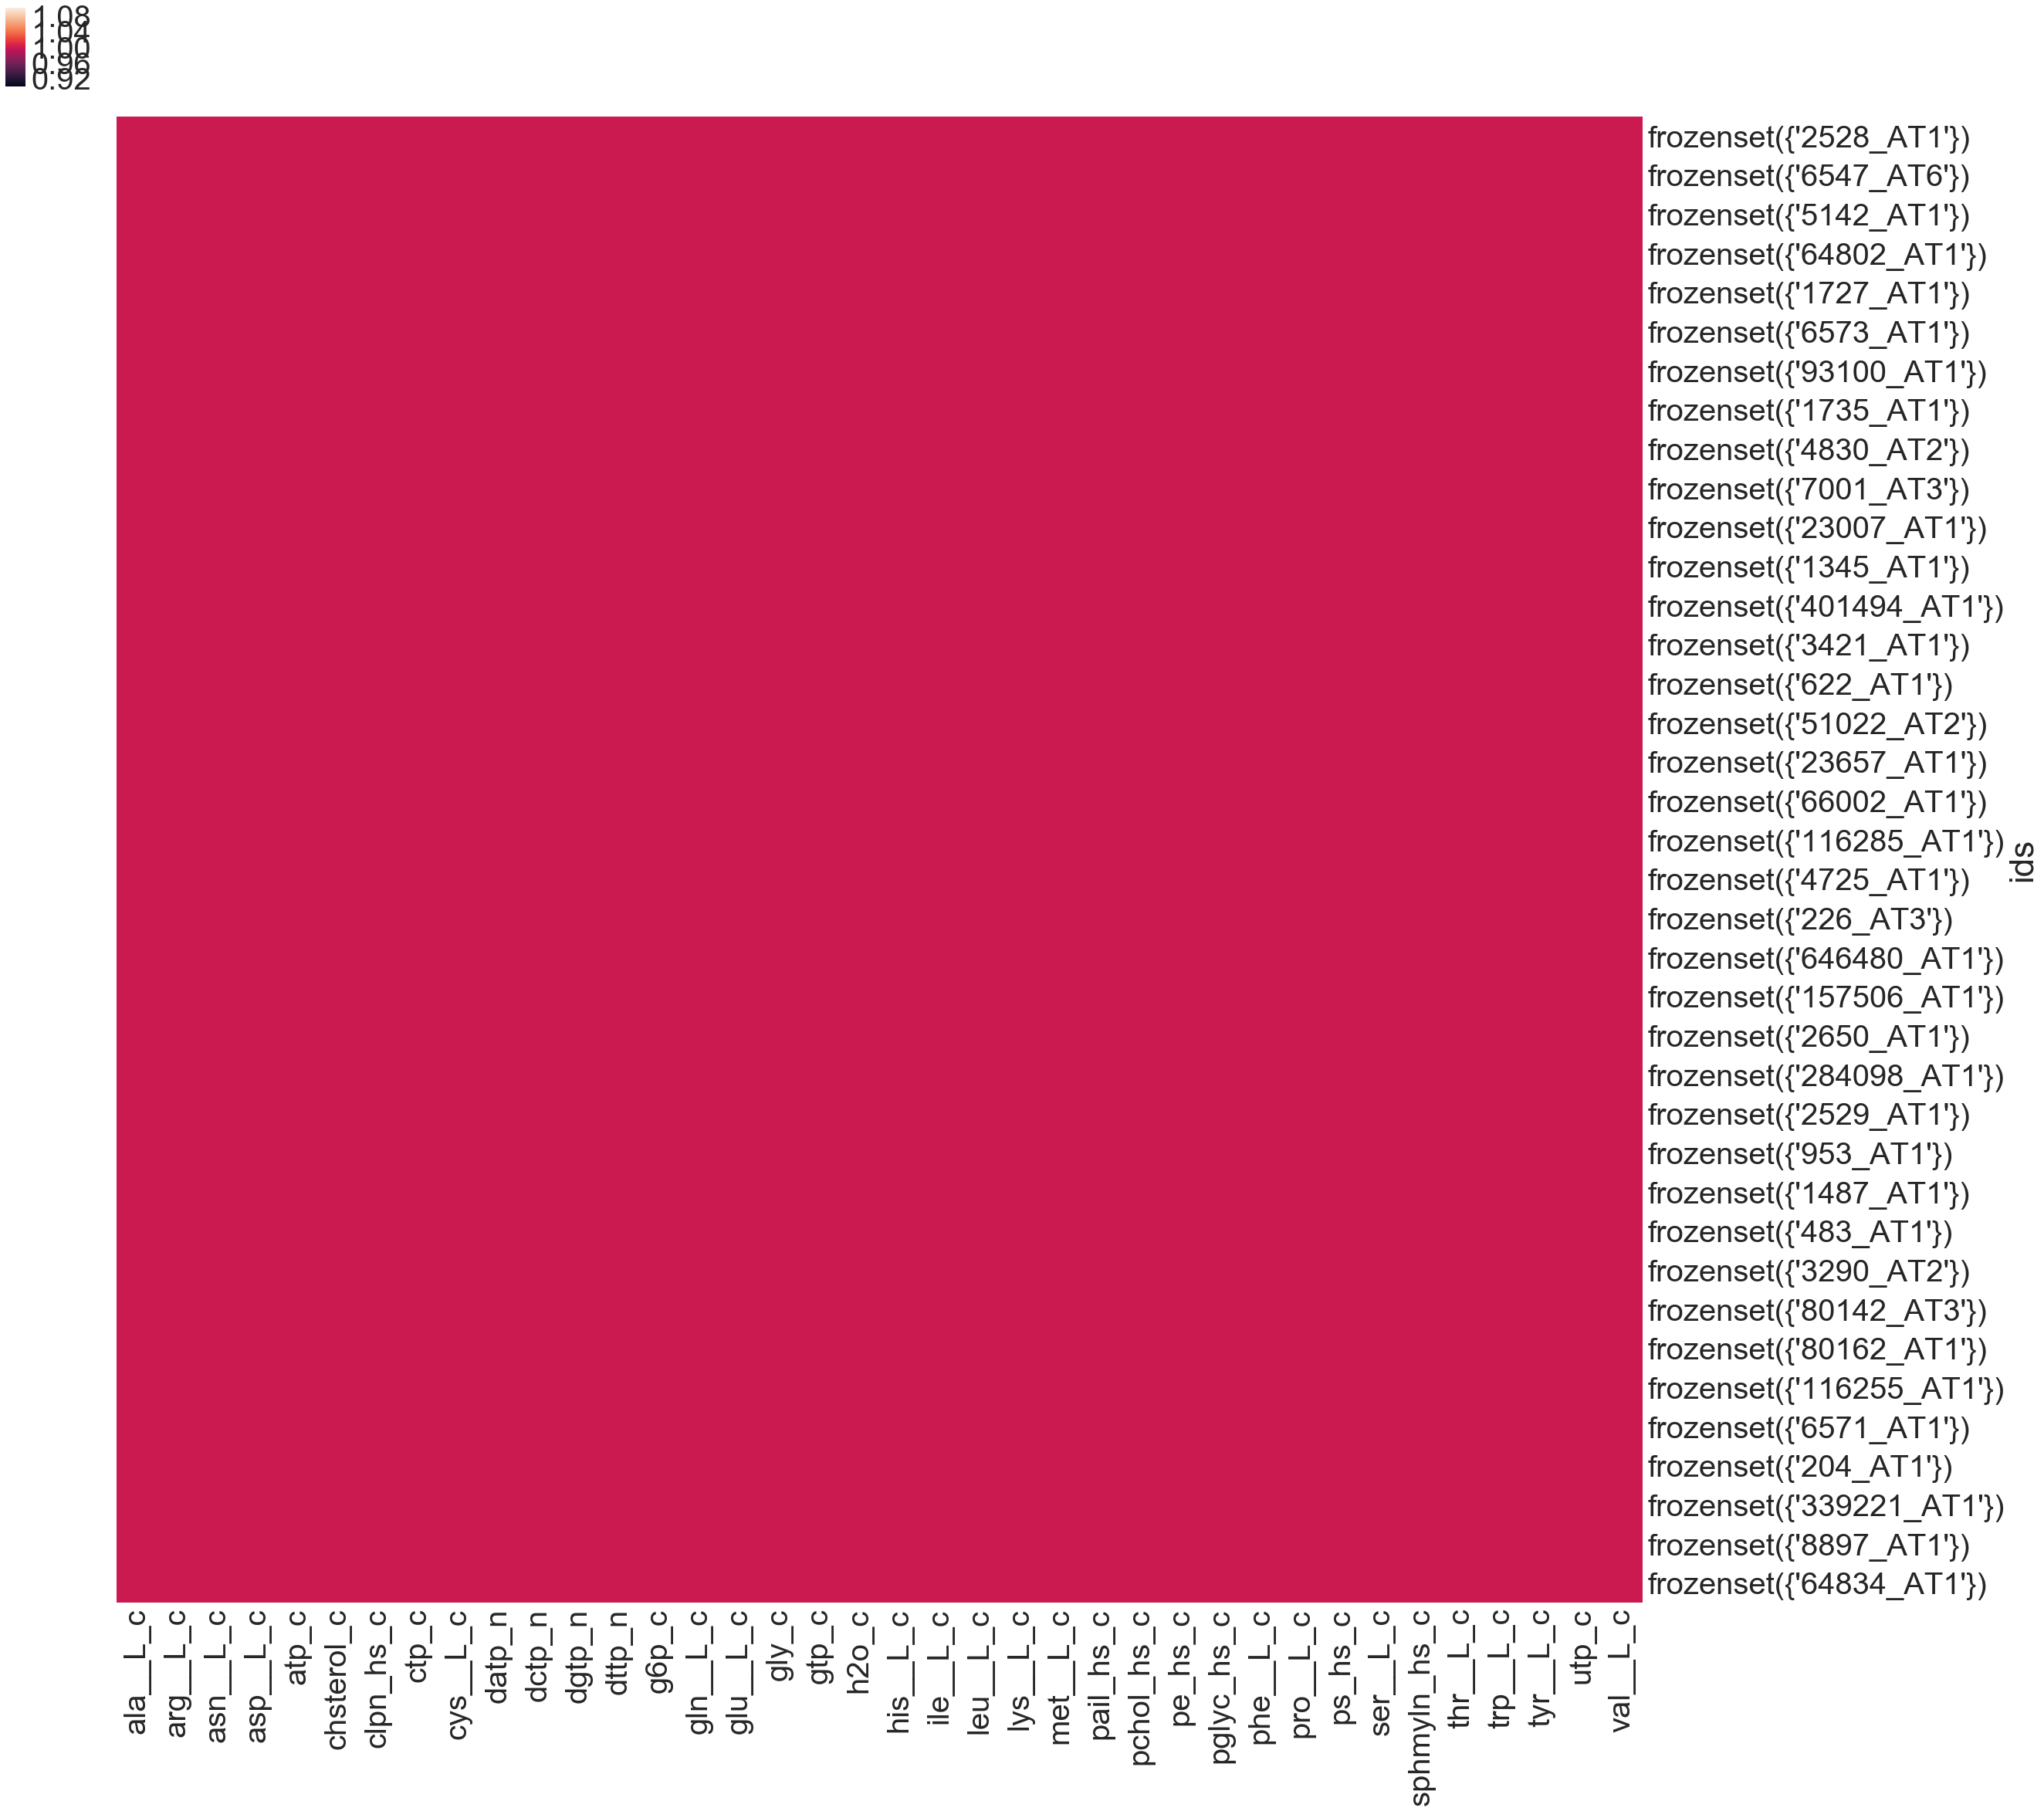

In [17]:
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)
sns.set(font_scale=4)
g = sns.clustermap(oks,
                   figsize=oks.shape,
                  row_cluster=True,
                  col_cluster=True)
g.savefig('metabolite_producibility_Recon3D_rich_media.png')

![Figure 1](Figure1_Bioinformatics_2005.png)

### Comparison of Cobrapy implementation with Figure 2

In [22]:
fig_2_gene_order = pd.read_table('Figure2_gene_order.tab')['Genes'].values
fig_2_gene_order

array(['ndk', 'accD', 'accB', 'accA', 'accC', 'fabD', 'fabG', 'fabI',
       'mrsA', 'glmU', 'fabA', 'fabZ', 'fabB', 'fabF', 'plsC', 'plsB',
       'cdsA', 'pldA', 'adk', 'kdsA', 'lpxA', 'lpxC', 'lpxD', 'ushA',
       'lpxB', 'lpxK', 'dsB', 'kdtA', 'dxs', 'dxr', 'ispF', 'ispE',
       'ispD', 'gcpE', 'lytB', 'ispA', 'uppS', 'gmk', 'pgsA', 'lpxP',
       'msbB', 'lpxL', 'murB', 'murC', 'murA', 'murI', 'murD', 'murE',
       'murF', 'mraY', 'murG', 'gltX', 'cls', 'ribB', 'mgsA', 'thiL',
       'wecA', 'prsA', 'pssA', 'psd', 'metK', 'astA', 'tmk'], dtype=object)

In [26]:
fig_2_metab_order = (pd.read_table('Figure2_metabolite_order.tab')['Metabolites'] + '_c').values
figure2_mets = [ijr904.metabolites.get_by_id(met)
                for met in fig_2_metab_order]
figure2_mets

[<Metabolite uaagmda_c at 0x1152f2080>,
 <Metabolite uagmda_c at 0x1152f2198>,
 <Metabolite lipa_c at 0x1152bbc18>,
 <Metabolite kdo2lipid4p_c at 0x1152bb908>,
 <Metabolite lipa_c at 0x1152bbc18>,
 <Metabolite kdo2lipid4L_c at 0x1152bb898>,
 <Metabolite kdo2lipid4_c at 0x1152bb8d0>,
 <Metabolite kdolipid4_c at 0x1152bb9b0>,
 <Metabolite lipidA_c at 0x1152bbc88>,
 <Metabolite lipidAds_c at 0x1152bbcc0>,
 <Metabolite lipidX_c at 0x1152bbcf8>,
 <Metabolite u23ga_c at 0x1152e4f98>,
 <Metabolite u3hga_c at 0x1152f2048>,
 <Metabolite u3aga_c at 0x1152e4fd0>,
 <Metabolite ttdcea_c at 0x1152e4ef0>,
 <Metabolite hdcea_c at 0x1152bb0f0>,
 <Metabolite ocdcea_c at 0x1152c9c50>,
 <Metabolite agpg_EC_c at 0x115285400>,
 <Metabolite pe_EC_c at 0x1152d70b8>,
 <Metabolite ps_EC_c at 0x1152d7908>,
 <Metabolite clpn_EC_c at 0x115293320>,
 <Metabolite pg_EC_c at 0x1152d7198>,
 <Metabolite pgp_EC_c at 0x1152d71d0>,
 <Metabolite cdpdag_EC_c at 0x115293080>,
 <Metabolite 12dgr_EC_c at 0x115267390>,
 <Metabol

In [ ]:
ijr904_figure2 = apply_rich_media(augment_model_with_sink_rxns(ijr904, figure2_mets  ))
metabolite_production = {}
kos = pd.DataFrame()
for reactant in figure2_mets:
    with ijr904_figure2:
        ijr904_figure2.objective = 'Sink_{}'.format(reactant.id)
        metabolite_production[('wild-type', reactant.id)] = ijr904_figure2.optimize().objective_value
        ko = single_gene_deletion(ijr904_figure2)
        kos[reactant.id] = ko['growth']

kos.to_csv('Figure2_cobra_naive_growth_rich_media.tab',sep='\t')

In [35]:
genes = pd.read_table('genes.tab', na_values='NIL').dropna().set_index('Blattner')
genes.index = [frozenset({gene}) for gene in genes.index]
kos['gene'] = genes['name']
missing_genes = [list(k)[0] for k in kos[kos['gene'].isna()].index]
print('\n'.join(missing_genes))

b1898
b3112
b3767
b3692
b2978
b3111
b1417
b3768
b1899
b1416
b4228
b4229


In [36]:
genes

,name
(b0765),modC
(b0808),ybiO
(b1856),mepM
(b3950),frwB
(b3410),feoC
(b4349),hsdM
(b1604),ydgH
(b0445),ybaE
(b3542),dppC
(b3391),hofQ


In [27]:
oks = kos[kos<1e-3].set_index('gene').T.loc[fig_2_metab_order,
                                           fig_2_gene_order].fillna(1)
oks.shape

/Users/zuck016/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/pandas/core/indexing.py:1472 FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


(67, 63)

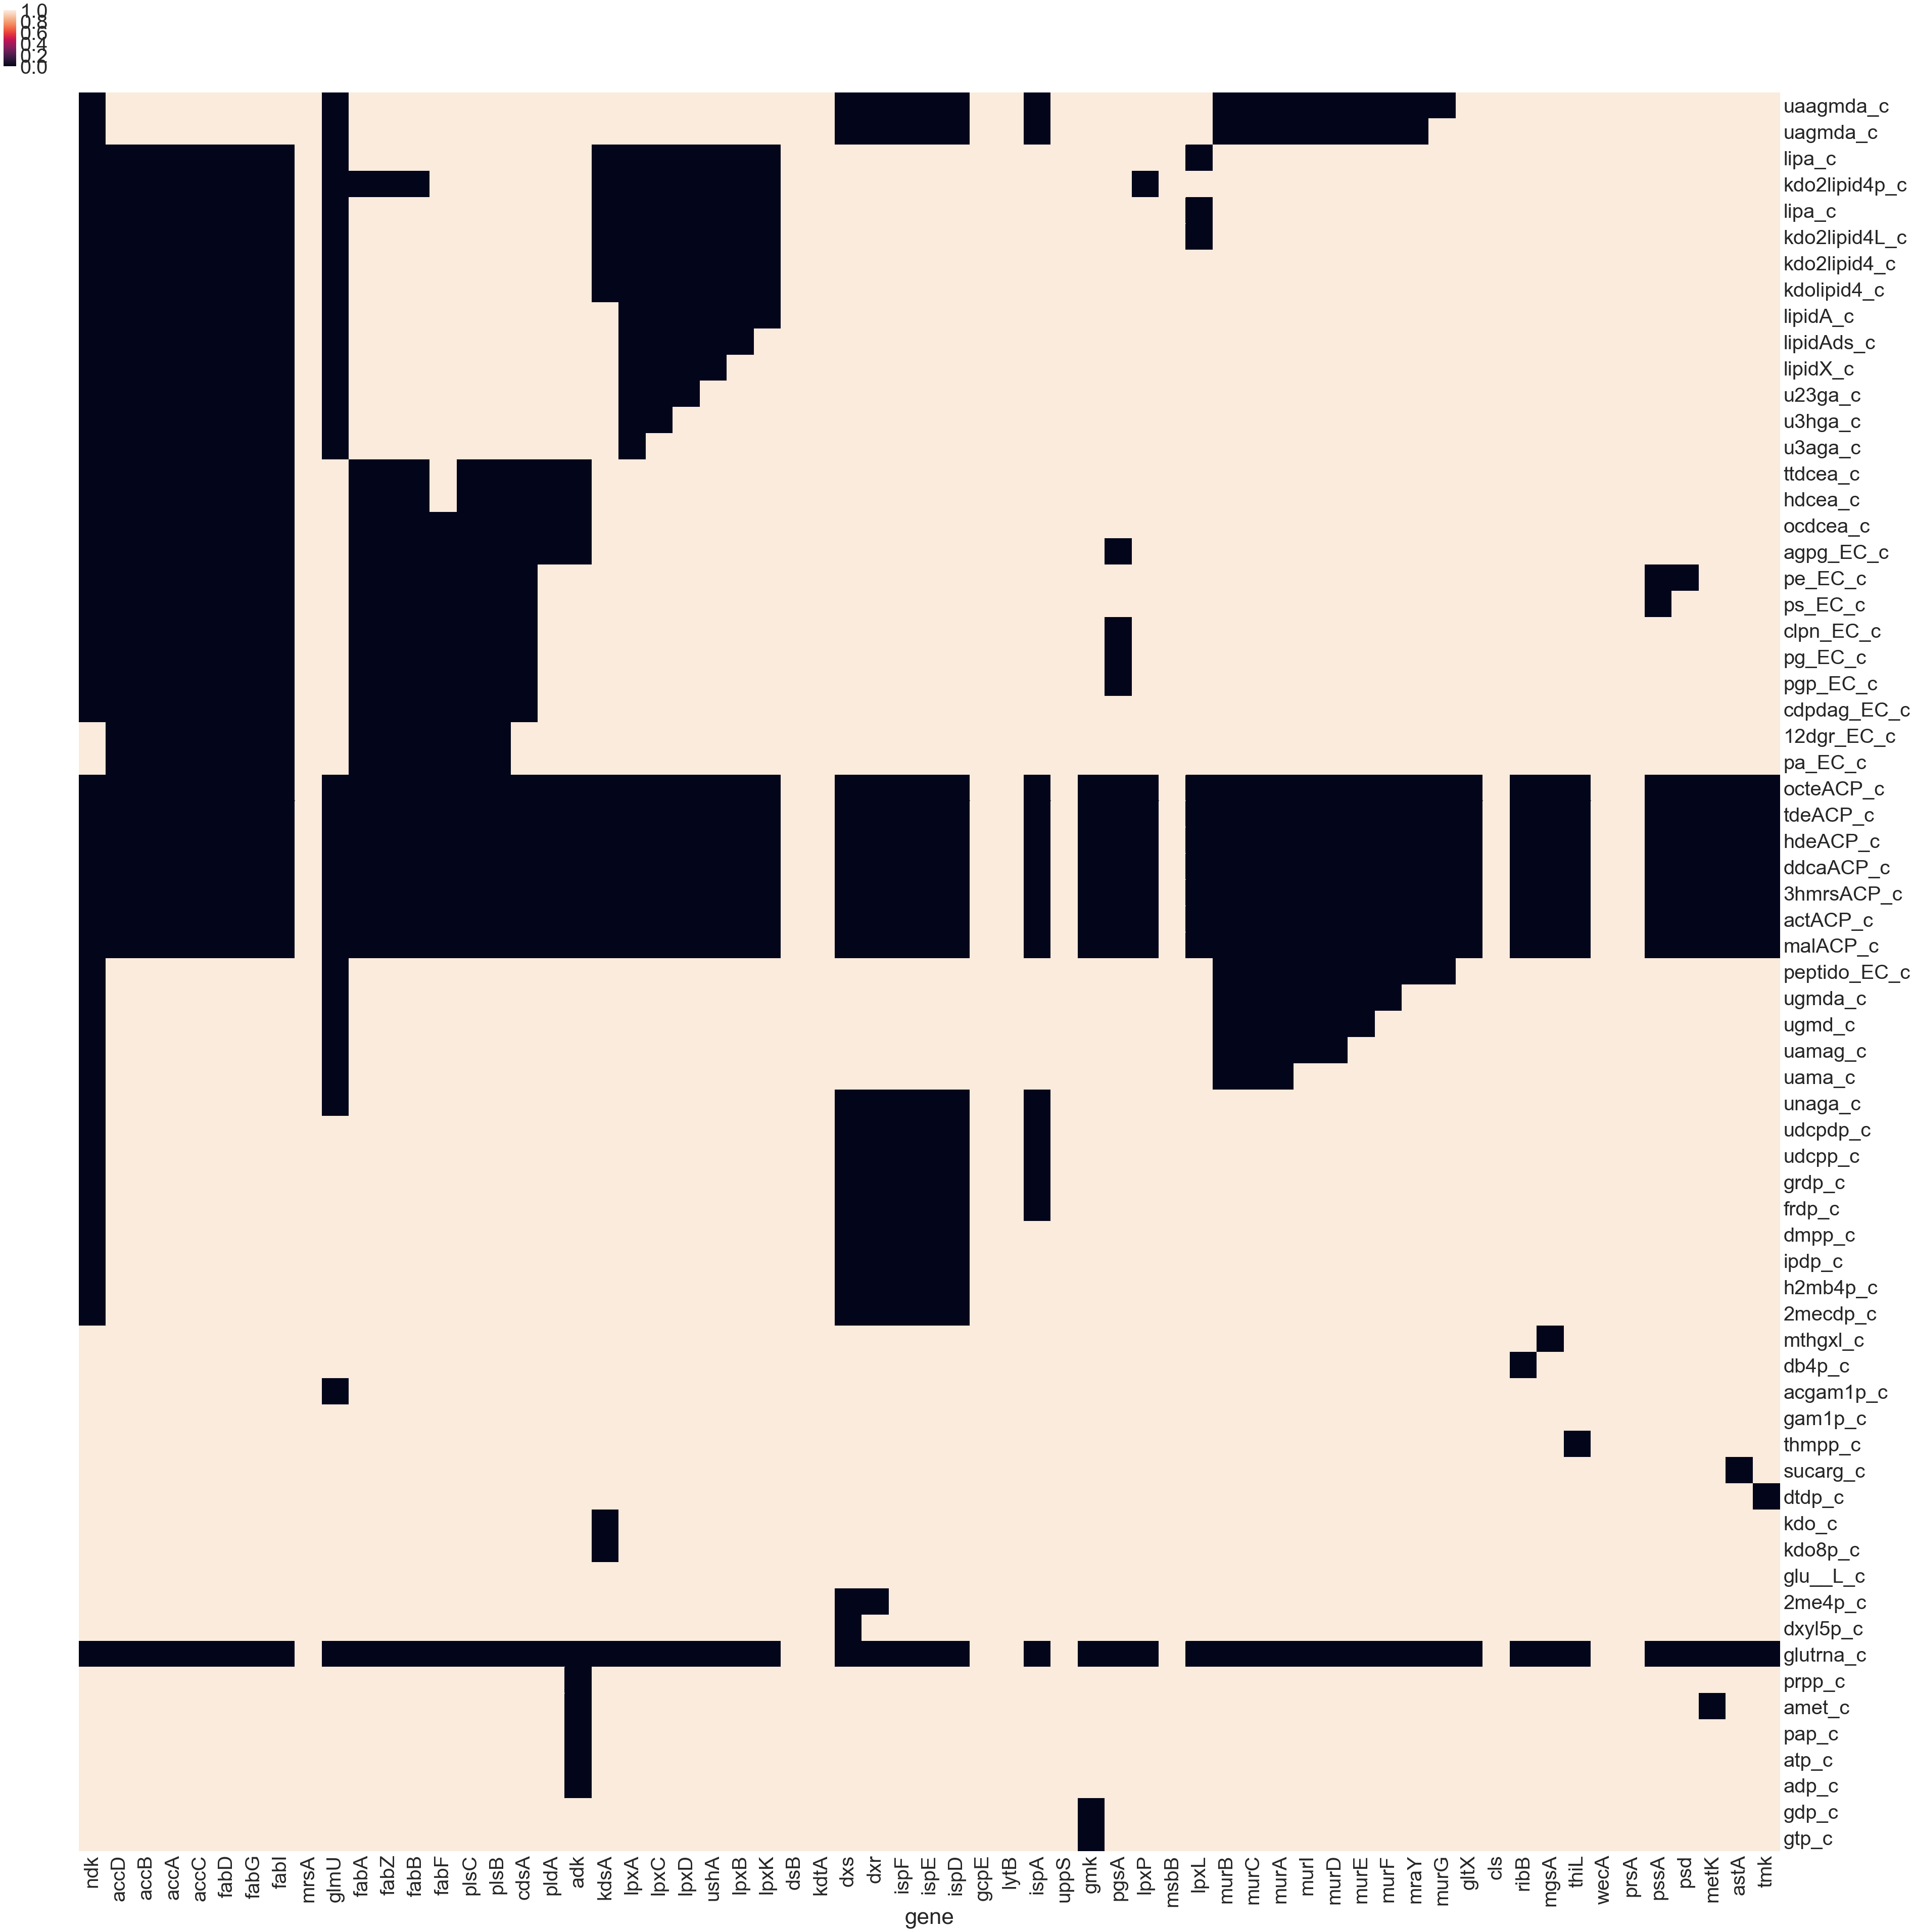

In [28]:
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)
sns.set(font_scale=4)
g = sns.clustermap(oks,
                   figsize=oks.T.shape,
                  row_cluster=False,
                  col_cluster=False)
g.savefig('Figure2_metabolite_producibility_cobra_rich_media.png')

![Figure2_Bioinformatics_2005.png](Figure2_Bioinformatics_2005.png)

# Omi